### Klasse Importieren

In [7]:
from ising import Isingmodel
import numpy as np

### Parameter und Instanz setzten

In [8]:
N = 50
beta = 1 / 2.269
sweeps = 1000

model = Isingmodel(N=N, init=False)
lattice = model.grid(N)
energy = model.get_energy(lattice)

### Ausführung des Metropolis Algorithmus

In [9]:
spins, energies, equilibrium, spin_sq = model.metropolis(lattice, sweeps, beta, energy, N)

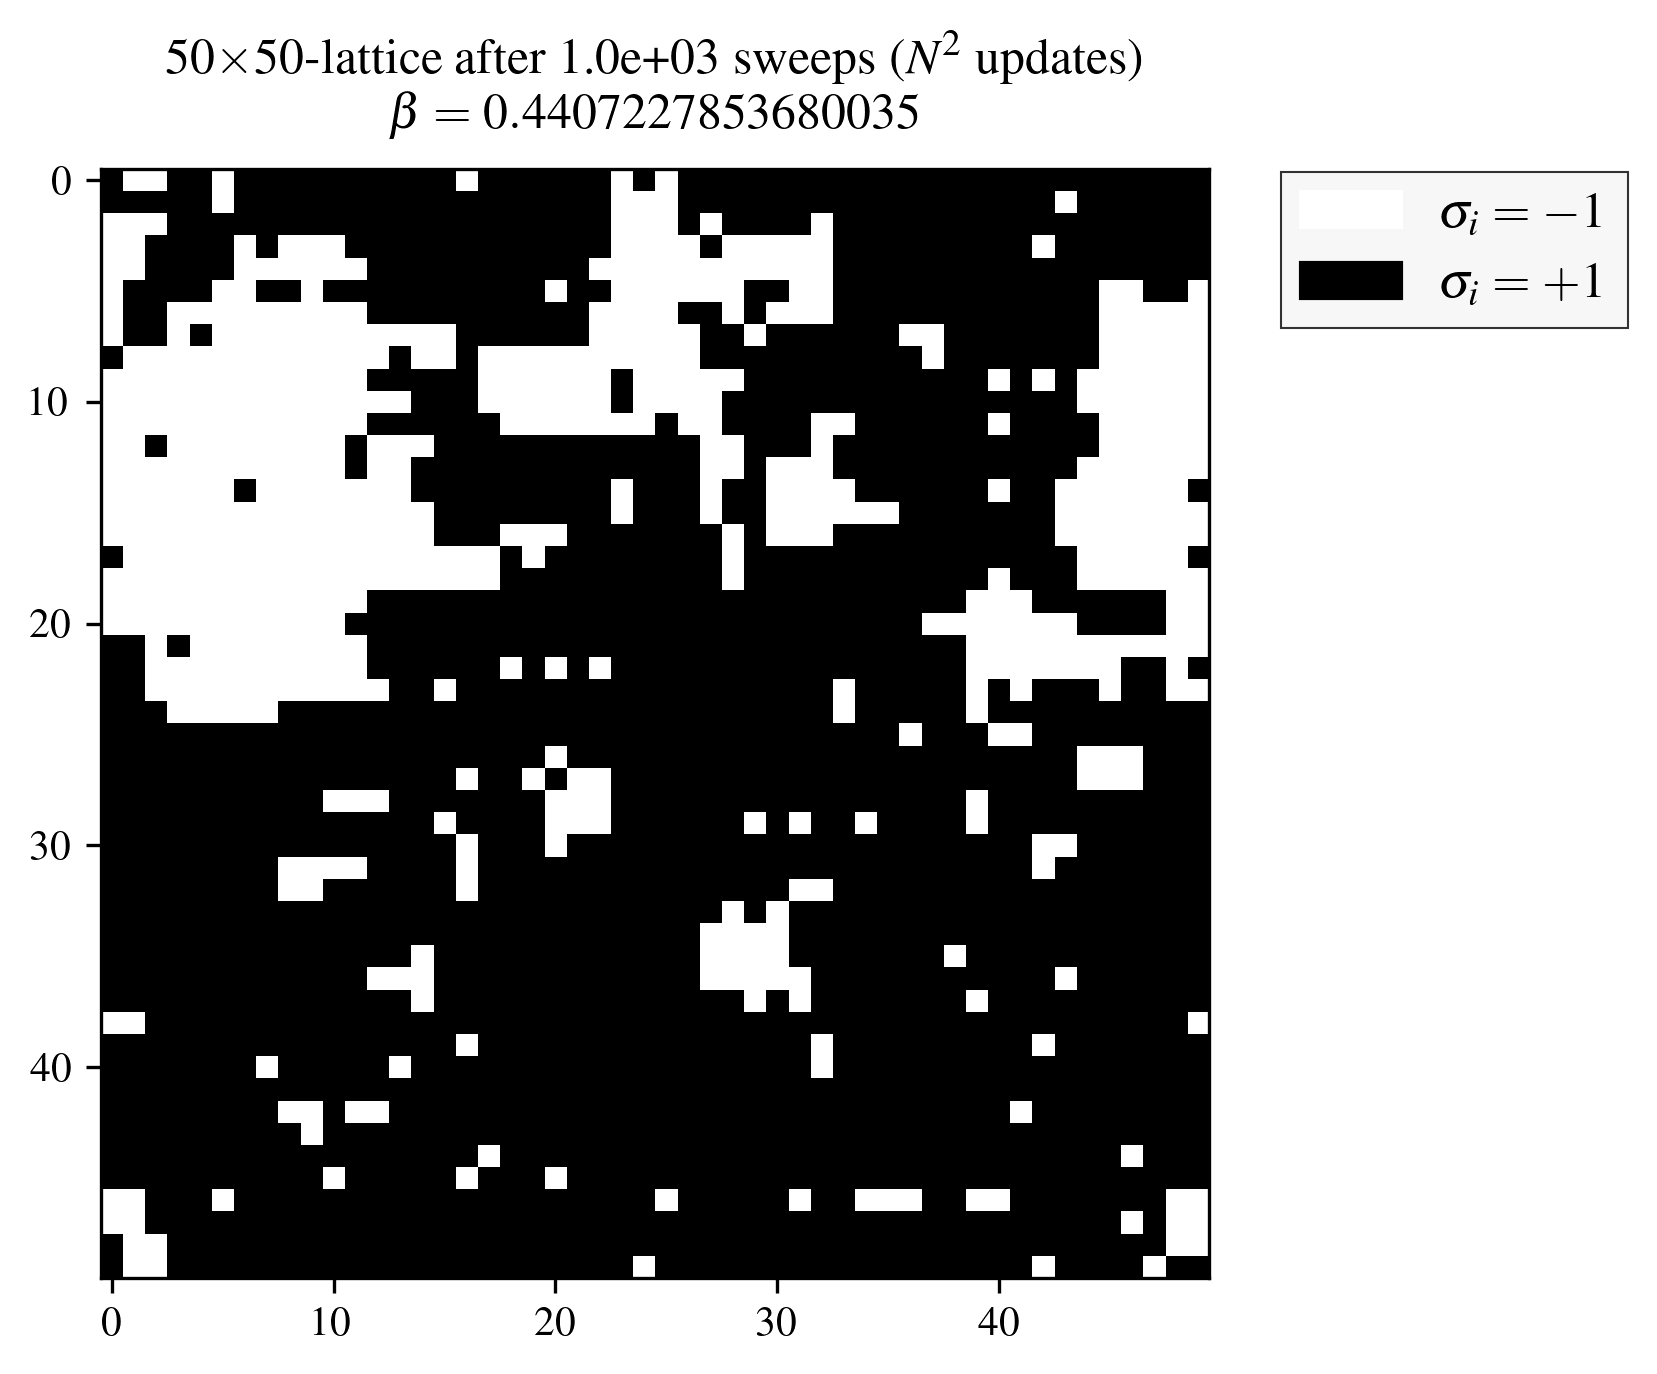

In [10]:
model.plot(equilibrium=equilibrium, cmap='binary', times=sweeps, beta=beta, save=True)

In [13]:
animation = model.animation(lattice, sweeps, beta, energy, N)

In [14]:
model.save(animation, path='/Users/danielmiksch/Library/CloudStorage/OneDrive-Persönlich/Uni/7. Semester/CP/Animations/beta01.gif', font_size=20, display_sweeps=True)

### Magnetisierung

In [19]:
betas = np.linspace(0.3, 0.7, 30)
N = [20]
sweeps = [10000 for i in N]
sampleSize = [1000 for i in N]
iterations = 1

In [20]:
model = Isingmodel()
magnetization = model.get_magnetization(N, betas, sweeps, sampleSize, iterations)

/Users/danielmiksch/miniconda3/envs/juplab/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/danielmiksch/miniconda3/envs/juplab/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [26]:
from scipy.interpolate import interp1d

interp20 = interp1d(betas, magnetization[0], kind='quadratic')

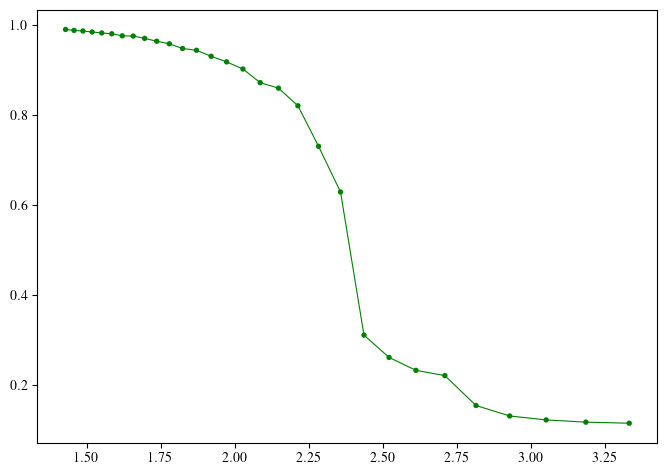

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, (9/16)*10), dpi=100)
ax.scatter(1 / betas, magnetization[0], label=r'$20\times 20$-lattice', marker='.', s=60, edgecolors='none', color='green')
ax.plot(1 / betas, interp20(betas), c='green', linewidth=.8, label='', zorder=2)